In [24]:
import urllib.request
import re
from collections import OrderedDict
from datetime import datetime
from datetime import timedelta
from matplotlib import pyplot as plt
#https://github.com/nficano/pytube
from pytube import YouTube
import cv2
import numpy as np

In [25]:
verbose = True

In [26]:
def get_youtube_paths(playlist_url):

    final_url = []
    eq = playlist_url.rfind('=') + 1
    cPL = playlist_url[eq:]
    yTUBE = urllib.request.urlopen(playlist_url).read()
    sTUBE = str(yTUBE)
    tmp_mat = re.compile(r'watch\?v=\S+?list=' + cPL)
    mat = re.findall(tmp_mat, sTUBE)
    for PL in mat:
        yPL = str(PL)
        if '&' in yPL:
            yPL_amp = yPL.index('&')
        final_url.append('http://www.youtube.com/' + yPL[:yPL_amp])

    all_url = list(OrderedDict.fromkeys(final_url))

    video_dict = {}

    for url in all_url:
        yt = YouTube(url)
        title = yt.title
        date_string = re.findall("(\d+\-\d+\-\d+)", title)
        date = datetime.strptime(date_string[0], "%d-%m-%Y")
        video_dict[date.date()] = yt.streams.first().url

        video_dates = sorted(video_dict.keys())

    if verbose:
        for date in video_dates:
            print(date)
            print(video_dict[date])

    return video_dates, video_dict

In [27]:
def yield_playlist(date):
    img_index = 0
    url = url_dict.get(date, False)
    print(url)
    if url:
        cap = cv2.VideoCapture(url)
        if not cap.isOpened():
            print('\n>>> Failed to capture {}'.format(date))
            yield None
        else:
            ret = True
            while ret:
                ret, frame = cap.read()
                print(img_index)
                yield ret, img_index, frame
                img_index += 1

            cap.release()

In [28]:
playlist_url = "https://www.youtube.com/watch?v=f5V-cH-9udI&list=UUDDgDE-EMc-tSyp7xy4Pk9w"

In [29]:
dates, url_dict = get_youtube_paths(playlist_url)

2015-10-28
https://r6---sn-cu-ajtee.googlevideo.com/videoplayback?ratebypass=yes&mn=sn-cu-ajtee,sn-aigl6ned&mm=31,29&requiressl=yes&key=yt6&expire=1534644350&dur=556.001&pl=25&source=youtube&ms=au,rdu&mime=video/mp4&mv=m&mt=1534622618&ipbits=0&signature=54D1A54D894AEDCBC5AB8A8EFE2449A801738389.291EF0670C5294A20657557D5AFBA147C55688BE&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,pl,ratebypass,requiressl,source,expire&ip=86.148.110.59&fvip=4&c=WEB&lmt=1446080581697395&id=o-AN8_s5PQ9Vl3qA3M-SNDWrJTSHjOuPykSTQZPwvf9Kmr&ei=Hnx4W9r1H9Lj1gaE5KrwAw&itag=22&initcwndbps=1475000
2015-10-29
https://r5---sn-cu-ajtes.googlevideo.com/videoplayback?itag=22&mm=31,29&c=WEB&mn=sn-cu-ajtes,sn-aigzrn7e&mime=video/mp4&ip=86.148.110.59&pl=25&signature=A0C303C467333146578318020DEB9FB469CB17E2.61CDA011765C87E6E28087BAF6C1598B2A61BCC4&expire=1534644957&initcwndbps=1468750&mv=m&mt=1534623283&ms=au,rdu&ipbits=0&lmt=1446165883626710&requiressl=yes&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,l

In [30]:
#start_date = datetime.strptime('2015-11-05 00:00:00', '%Y-%m-%d %H:%M:%S')
start_date = min(dates)
end_date = max(dates)
print(start_date)
print(end_date)
graphic_start = datetime.strptime('2015-10-26 00:00:00', '%Y-%m-%d %H:%M:%S').date()
diff = end_date - graphic_start
weeks = int(diff.days/ 7) + 1
print(weeks)

2015-10-28
2016-02-25
18


In [31]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
date_list = [graphic_start + timedelta(days=x*7) for x in range(0, weeks)]

In [32]:
# Load example to get size
cap = cv2.VideoCapture(url_dict[dates[0]])
ret, frame = cap.read()
row, col, ch = frame.shape
blank_image = np.zeros((col, row, ch), dtype = "uint8")

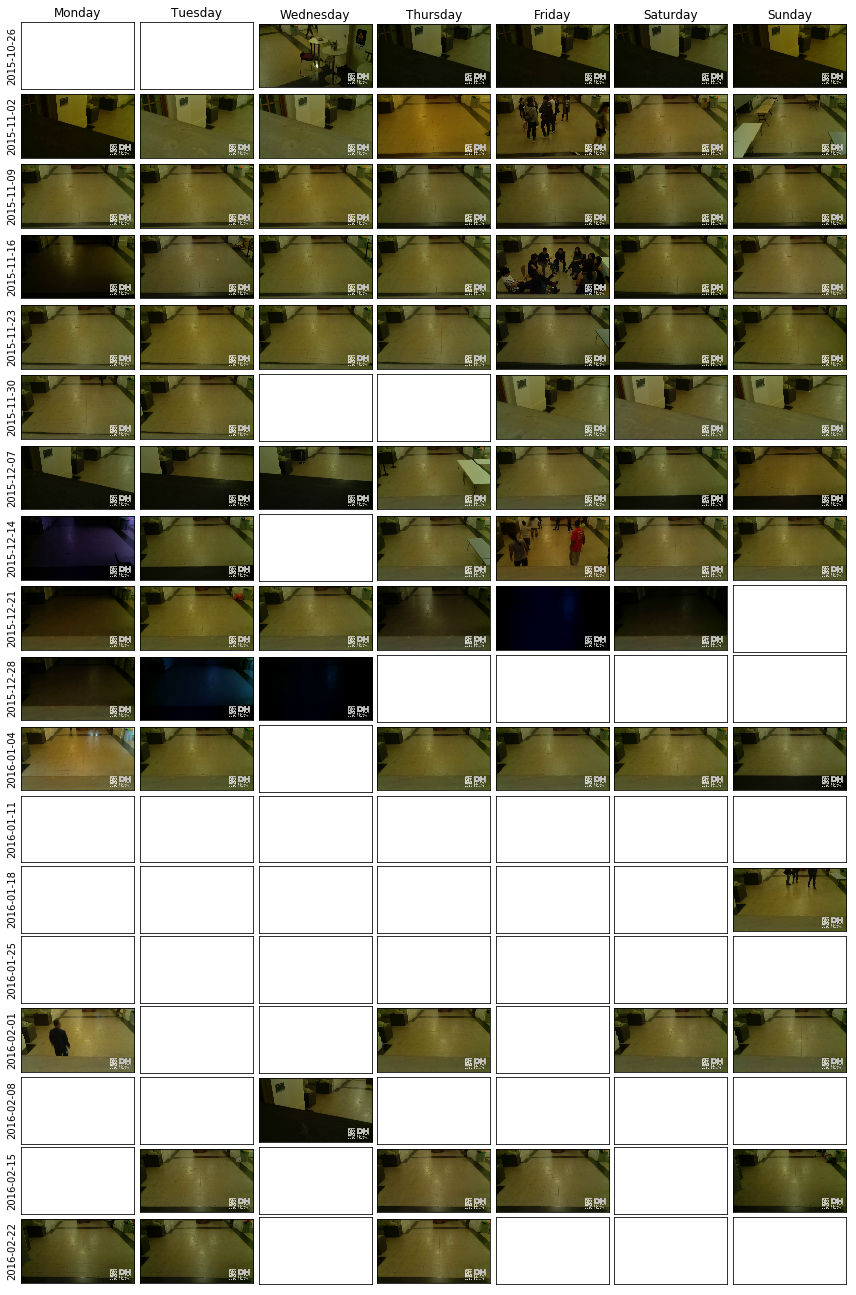

In [33]:
fig, axes = plt.subplots(nrows=weeks, ncols=7, figsize=(12, 1 * weeks)) 

date = graphic_start

for w, week in enumerate(date_list):
    axes[w, 0].set_ylabel(week)
    for d, day in enumerate(days):
        url = url_dict.get(date, False)
        if url:
            cap = cv2.VideoCapture(url)
            ret, frame = cap.read()
            if ret:
                imgrc = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                axes[w, d].imshow(imgrc)
            else:
                axes[w, d].imshow(blank_image)
        cap.release()
        date += timedelta(days=1)
        axes[w,d].set_xticks([])
        axes[w,d].set_yticks([])
        
pad = 5
for ax, day in zip(axes[0], days):
    ax.annotate(day, xy=(0.5, 1), xytext=(0, pad),
                xycoords='axes fraction', textcoords='offset points',
                size='large', ha='center', va='baseline')
        
fig.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.05, hspace=0.05)
plt.show()
 

In [ ]:
#fig.savefig('figures/3_0.png', bbox_inches='tight')

In [17]:
frames_gen = yield_playlist(start_date)
print('\nAccessing frames from Youtube playlist for : {}'.format(start_date))
    
for returned, img_index, frame in frames_gen:
    if not returned:
        break
    if img_index == 16677:
        frame_2 = frame
    print(img_index)

    


Accessing frames from Youtube playlist for : 2015-10-28
https://r4---sn-aigl6ned.googlevideo.com/videoplayback?requiressl=yes&fvip=4&mt=1534330625&ratebypass=yes&signature=B27FF80EADADF49682DC648C019A91994B80B2D5.433A209941A20714349E3E891157A36EFDD6417E&itag=22&ei=WAd0W_raNIPWxwKO_YCIDw&expire=1534352312&sparams=dur,ei,id,initcwndbps,ip,ipbits,itag,lmt,mime,mm,mn,ms,mv,pl,ratebypass,requiressl,source,expire&initcwndbps=1210000&key=yt6&id=o-ABJUJ10JEClcQFDDHu4tqiUK_e7gzU6zFcCy3yChlnKk&mn=sn-aigl6ned,sn-aigzrn7d&c=WEB&ipbits=0&mm=31,29&ms=au,rdu&lmt=1446080581697395&mv=m&dur=556.001&source=youtube&pl=16&mime=video/mp4&ip=144.82.8.179
0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
6

985
985
986
986
987
987
988
988
989
989
990
990
991
991
992
992
993
993
994
994
995
995
996
996
997
997
998
998
999
999
1000
1000
1001
1001
1002
1002
1003
1003
1004
1004
1005
1005
1006
1006
1007
1007
1008
1008
1009
1009
1010
1010
1011
1011
1012
1012
1013
1013
1014
1014
1015
1015
1016
1016
1017
1017
1018
1018
1019
1019
1020
1020
1021
1021
1022
1022
1023
1023
1024
1024
1025
1025
1026
1026
1027
1027
1028
1028
1029
1029
1030
1030
1031
1031
1032
1032
1033
1033
1034
1034
1035
1035
1036
1036
1037
1037
1038
1038
1039
1039
1040
1040
1041
1041
1042
1042
1043
1043
1044
1044
1045
1045
1046
1046
1047
1047
1048
1048
1049
1049
1050
1050
1051
1051
1052
1052
1053
1053
1054
1054
1055
1055
1056
1056
1057
1057
1058
1058
1059
1059
1060
1060
1061
1061
1062
1062
1063
1063
1064
1064
1065
1065
1066
1066
1067
1067
1068
1068
1069
1069
1070
1070
1071
1071
1072
1072
1073
1073
1074
1074
1075
1075
1076
1076
1077
1077
1078
1078
1079
1079
1080
1080
1081
1081
1082
1082
1083
1083
1084
1084
1085
1085
1086
1086
1087
1087


1841
1841
1842
1842
1843
1843
1844
1844
1845
1845
1846
1846
1847
1847
1848
1848
1849
1849
1850
1850
1851
1851
1852
1852
1853
1853
1854
1854
1855
1855
1856
1856
1857
1857
1858
1858
1859
1859
1860
1860
1861
1861
1862
1862
1863
1863
1864
1864
1865
1865
1866
1866
1867
1867
1868
1868
1869
1869
1870
1870
1871
1871
1872
1872
1873
1873
1874
1874
1875
1875
1876
1876
1877
1877
1878
1878
1879
1879
1880
1880
1881
1881
1882
1882
1883
1883
1884
1884
1885
1885
1886
1886
1887
1887
1888
1888
1889
1889
1890
1890
1891
1891
1892
1892
1893
1893
1894
1894
1895
1895
1896
1896
1897
1897
1898
1898
1899
1899
1900
1900
1901
1901
1902
1902
1903
1903
1904
1904
1905
1905
1906
1906
1907
1907
1908
1908
1909
1909
1910
1910
1911
1911
1912
1912
1913
1913
1914
1914
1915
1915
1916
1916
1917
1917
1918
1918
1919
1919
1920
1920
1921
1921
1922
1922
1923
1923
1924
1924
1925
1925
1926
1926
1927
1927
1928
1928
1929
1929
1930
1930
1931
1931
1932
1932
1933
1933
1934
1934
1935
1935
1936
1936
1937
1937
1938
1938
1939
1939
1940
1940


2721
2721
2722
2722
2723
2723
2724
2724
2725
2725
2726
2726
2727
2727
2728
2728
2729
2729
2730
2730
2731
2731
2732
2732
2733
2733
2734
2734
2735
2735
2736
2736
2737
2737
2738
2738
2739
2739
2740
2740
2741
2741
2742
2742
2743
2743
2744
2744
2745
2745
2746
2746
2747
2747
2748
2748
2749
2749
2750
2750
2751
2751
2752
2752
2753
2753
2754
2754
2755
2755
2756
2756
2757
2757
2758
2758
2759
2759
2760
2760
2761
2761
2762
2762
2763
2763
2764
2764
2765
2765
2766
2766
2767
2767
2768
2768
2769
2769
2770
2770
2771
2771
2772
2772
2773
2773
2774
2774
2775
2775
2776
2776
2777
2777
2778
2778
2779
2779
2780
2780
2781
2781
2782
2782
2783
2783
2784
2784
2785
2785
2786
2786
2787
2787
2788
2788
2789
2789
2790
2790
2791
2791
2792
2792
2793
2793
2794
2794
2795
2795
2796
2796
2797
2797
2798
2798
2799
2799
2800
2800
2801
2801
2802
2802
2803
2803
2804
2804
2805
2805
2806
2806
2807
2807
2808
2808
2809
2809
2810
2810
2811
2811
2812
2812
2813
2813
2814
2814
2815
2815
2816
2816
2817
2817
2818
2818
2819
2819
2820
2820


3591
3591
3592
3592
3593
3593
3594
3594
3595
3595
3596
3596
3597
3597
3598
3598
3599
3599
3600
3600
3601
3601
3602
3602
3603
3603
3604
3604
3605
3605
3606
3606
3607
3607
3608
3608
3609
3609
3610
3610
3611
3611
3612
3612
3613
3613
3614
3614
3615
3615
3616
3616
3617
3617
3618
3618
3619
3619
3620
3620
3621
3621
3622
3622
3623
3623
3624
3624
3625
3625
3626
3626
3627
3627
3628
3628
3629
3629
3630
3630
3631
3631
3632
3632
3633
3633
3634
3634
3635
3635
3636
3636
3637
3637
3638
3638
3639
3639
3640
3640
3641
3641
3642
3642
3643
3643
3644
3644
3645
3645
3646
3646
3647
3647
3648
3648
3649
3649
3650
3650
3651
3651
3652
3652
3653
3653
3654
3654
3655
3655
3656
3656
3657
3657
3658
3658
3659
3659
3660
3660
3661
3661
3662
3662
3663
3663
3664
3664
3665
3665
3666
3666
3667
3667
3668
3668
3669
3669
3670
3670
3671
3671
3672
3672
3673
3673
3674
3674
3675
3675
3676
3676
3677
3677
3678
3678
3679
3679
3680
3680
3681
3681
3682
3682
3683
3683
3684
3684
3685
3685
3686
3686
3687
3687
3688
3688
3689
3689
3690
3690


4450
4450
4451
4451
4452
4452
4453
4453
4454
4454
4455
4455
4456
4456
4457
4457
4458
4458
4459
4459
4460
4460
4461
4461
4462
4462
4463
4463
4464
4464
4465
4465
4466
4466
4467
4467
4468
4468
4469
4469
4470
4470
4471
4471
4472
4472
4473
4473
4474
4474
4475
4475
4476
4476
4477
4477
4478
4478
4479
4479
4480
4480
4481
4481
4482
4482
4483
4483
4484
4484
4485
4485
4486
4486
4487
4487
4488
4488
4489
4489
4490
4490
4491
4491
4492
4492
4493
4493
4494
4494
4495
4495
4496
4496
4497
4497
4498
4498
4499
4499
4500
4500
4501
4501
4502
4502
4503
4503
4504
4504
4505
4505
4506
4506
4507
4507
4508
4508
4509
4509
4510
4510
4511
4511
4512
4512
4513
4513
4514
4514
4515
4515
4516
4516
4517
4517
4518
4518
4519
4519
4520
4520
4521
4521
4522
4522
4523
4523
4524
4524
4525
4525
4526
4526
4527
4527
4528
4528
4529
4529
4530
4530
4531
4531
4532
4532
4533
4533
4534
4534
4535
4535
4536
4536
4537
4537
4538
4538
4539
4539
4540
4540
4541
4541
4542
4542
4543
4543
4544
4544
4545
4545
4546
4546
4547
4547
4548
4548
4549
4549


5326
5326
5327
5327
5328
5328
5329
5329
5330
5330
5331
5331
5332
5332
5333
5333
5334
5334
5335
5335
5336
5336
5337
5337
5338
5338
5339
5339
5340
5340
5341
5341
5342
5342
5343
5343
5344
5344
5345
5345
5346
5346
5347
5347
5348
5348
5349
5349
5350
5350
5351
5351
5352
5352
5353
5353
5354
5354
5355
5355
5356
5356
5357
5357
5358
5358
5359
5359
5360
5360
5361
5361
5362
5362
5363
5363
5364
5364
5365
5365
5366
5366
5367
5367
5368
5368
5369
5369
5370
5370
5371
5371
5372
5372
5373
5373
5374
5374
5375
5375
5376
5376
5377
5377
5378
5378
5379
5379
5380
5380
5381
5381
5382
5382
5383
5383
5384
5384
5385
5385
5386
5386
5387
5387
5388
5388
5389
5389
5390
5390
5391
5391
5392
5392
5393
5393
5394
5394
5395
5395
5396
5396
5397
5397
5398
5398
5399
5399
5400
5400
5401
5401
5402
5402
5403
5403
5404
5404
5405
5405
5406
5406
5407
5407
5408
5408
5409
5409
5410
5410
5411
5411
5412
5412
5413
5413
5414
5414
5415
5415
5416
5416
5417
5417
5418
5418
5419
5419
5420
5420
5421
5421
5422
5422
5423
5423
5424
5424
5425
5425


6150
6150
6151
6151
6152
6152
6153
6153
6154
6154
6155
6155
6156
6156
6157
6157
6158
6158
6159
6159
6160
6160
6161
6161
6162
6162
6163
6163
6164
6164
6165
6165
6166
6166
6167
6167
6168
6168
6169
6169
6170
6170
6171
6171
6172
6172
6173
6173
6174
6174
6175
6175
6176
6176
6177
6177
6178
6178
6179
6179
6180
6180
6181
6181
6182
6182
6183
6183
6184
6184
6185
6185
6186
6186
6187
6187
6188
6188
6189
6189
6190
6190
6191
6191
6192
6192
6193
6193
6194
6194
6195
6195
6196
6196
6197
6197
6198
6198
6199
6199
6200
6200
6201
6201
6202
6202
6203
6203
6204
6204
6205
6205
6206
6206
6207
6207
6208
6208
6209
6209
6210
6210
6211
6211
6212
6212
6213
6213
6214
6214
6215
6215
6216
6216
6217
6217
6218
6218
6219
6219
6220
6220
6221
6221
6222
6222
6223
6223
6224
6224
6225
6225
6226
6226
6227
6227
6228
6228
6229
6229
6230
6230
6231
6231
6232
6232
6233
6233
6234
6234
6235
6235
6236
6236
6237
6237
6238
6238
6239
6239
6240
6240
6241
6241
6242
6242
6243
6243
6244
6244
6245
6245
6246
6246
6247
6247
6248
6248
6249
6249


6990
6990
6991
6991
6992
6992
6993
6993
6994
6994
6995
6995
6996
6996
6997
6997
6998
6998
6999
6999
7000
7000
7001
7001
7002
7002
7003
7003
7004
7004
7005
7005
7006
7006
7007
7007
7008
7008
7009
7009
7010
7010
7011
7011
7012
7012
7013
7013
7014
7014
7015
7015
7016
7016
7017
7017
7018
7018
7019
7019
7020
7020
7021
7021
7022
7022
7023
7023
7024
7024
7025
7025
7026
7026
7027
7027
7028
7028
7029
7029
7030
7030
7031
7031
7032
7032
7033
7033
7034
7034
7035
7035
7036
7036
7037
7037
7038
7038
7039
7039
7040
7040
7041
7041
7042
7042
7043
7043
7044
7044
7045
7045
7046
7046
7047
7047
7048
7048
7049
7049
7050
7050
7051
7051
7052
7052
7053
7053
7054
7054
7055
7055
7056
7056
7057
7057
7058
7058
7059
7059
7060
7060
7061
7061
7062
7062
7063
7063
7064
7064
7065
7065
7066
7066
7067
7067
7068
7068
7069
7069
7070
7070
7071
7071
7072
7072
7073
7073
7074
7074
7075
7075
7076
7076
7077
7077
7078
7078
7079
7079
7080
7080
7081
7081
7082
7082
7083
7083
7084
7084
7085
7085
7086
7086
7087
7087
7088
7088
7089
7089


7860
7860
7861
7861
7862
7862
7863
7863
7864
7864
7865
7865
7866
7866
7867
7867
7868
7868
7869
7869
7870
7870
7871
7871
7872
7872
7873
7873
7874
7874
7875
7875
7876
7876
7877
7877
7878
7878
7879
7879
7880
7880
7881
7881
7882
7882
7883
7883
7884
7884
7885
7885
7886
7886
7887
7887
7888
7888
7889
7889
7890
7890
7891
7891
7892
7892
7893
7893
7894
7894
7895
7895
7896
7896
7897
7897
7898
7898
7899
7899
7900
7900
7901
7901
7902
7902
7903
7903
7904
7904
7905
7905
7906
7906
7907
7907
7908
7908
7909
7909
7910
7910
7911
7911
7912
7912
7913
7913
7914
7914
7915
7915
7916
7916
7917
7917
7918
7918
7919
7919
7920
7920
7921
7921
7922
7922
7923
7923
7924
7924
7925
7925
7926
7926
7927
7927
7928
7928
7929
7929
7930
7930
7931
7931
7932
7932
7933
7933
7934
7934
7935
7935
7936
7936
7937
7937
7938
7938
7939
7939
7940
7940
7941
7941
7942
7942
7943
7943
7944
7944
7945
7945
7946
7946
7947
7947
7948
7948
7949
7949
7950
7950
7951
7951
7952
7952
7953
7953
7954
7954
7955
7955
7956
7956
7957
7957
7958
7958
7959
7959


8740
8740
8741
8741
8742
8742
8743
8743
8744
8744
8745
8745
8746
8746
8747
8747
8748
8748
8749
8749
8750
8750
8751
8751
8752
8752
8753
8753
8754
8754
8755
8755
8756
8756
8757
8757
8758
8758
8759
8759
8760
8760
8761
8761
8762
8762
8763
8763
8764
8764
8765
8765
8766
8766
8767
8767
8768
8768
8769
8769
8770
8770
8771
8771
8772
8772
8773
8773
8774
8774
8775
8775
8776
8776
8777
8777
8778
8778
8779
8779
8780
8780
8781
8781
8782
8782
8783
8783
8784
8784
8785
8785
8786
8786
8787
8787
8788
8788
8789
8789
8790
8790
8791
8791
8792
8792
8793
8793
8794
8794
8795
8795
8796
8796
8797
8797
8798
8798
8799
8799
8800
8800
8801
8801
8802
8802
8803
8803
8804
8804
8805
8805
8806
8806
8807
8807
8808
8808
8809
8809
8810
8810
8811
8811
8812
8812
8813
8813
8814
8814
8815
8815
8816
8816
8817
8817
8818
8818
8819
8819
8820
8820
8821
8821
8822
8822
8823
8823
8824
8824
8825
8825
8826
8826
8827
8827
8828
8828
8829
8829
8830
8830
8831
8831
8832
8832
8833
8833
8834
8834
8835
8835
8836
8836
8837
8837
8838
8838
8839
8839


9606
9606
9607
9607
9608
9608
9609
9609
9610
9610
9611
9611
9612
9612
9613
9613
9614
9614
9615
9615
9616
9616
9617
9617
9618
9618
9619
9619
9620
9620
9621
9621
9622
9622
9623
9623
9624
9624
9625
9625
9626
9626
9627
9627
9628
9628
9629
9629
9630
9630
9631
9631
9632
9632
9633
9633
9634
9634
9635
9635
9636
9636
9637
9637
9638
9638
9639
9639
9640
9640
9641
9641
9642
9642
9643
9643
9644
9644
9645
9645
9646
9646
9647
9647
9648
9648
9649
9649
9650
9650
9651
9651
9652
9652
9653
9653
9654
9654
9655
9655
9656
9656
9657
9657
9658
9658
9659
9659
9660
9660
9661
9661
9662
9662
9663
9663
9664
9664
9665
9665
9666
9666
9667
9667
9668
9668
9669
9669
9670
9670
9671
9671
9672
9672
9673
9673
9674
9674
9675
9675
9676
9676
9677
9677
9678
9678
9679
9679
9680
9680
9681
9681
9682
9682
9683
9683
9684
9684
9685
9685
9686
9686
9687
9687
9688
9688
9689
9689
9690
9690
9691
9691
9692
9692
9693
9693
9694
9694
9695
9695
9696
9696
9697
9697
9698
9698
9699
9699
9700
9700
9701
9701
9702
9702
9703
9703
9704
9704
9705
9705


10417
10417
10418
10418
10419
10419
10420
10420
10421
10421
10422
10422
10423
10423
10424
10424
10425
10425
10426
10426
10427
10427
10428
10428
10429
10429
10430
10430
10431
10431
10432
10432
10433
10433
10434
10434
10435
10435
10436
10436
10437
10437
10438
10438
10439
10439
10440
10440
10441
10441
10442
10442
10443
10443
10444
10444
10445
10445
10446
10446
10447
10447
10448
10448
10449
10449
10450
10450
10451
10451
10452
10452
10453
10453
10454
10454
10455
10455
10456
10456
10457
10457
10458
10458
10459
10459
10460
10460
10461
10461
10462
10462
10463
10463
10464
10464
10465
10465
10466
10466
10467
10467
10468
10468
10469
10469
10470
10470
10471
10471
10472
10472
10473
10473
10474
10474
10475
10475
10476
10476
10477
10477
10478
10478
10479
10479
10480
10480
10481
10481
10482
10482
10483
10483
10484
10484
10485
10485
10486
10486
10487
10487
10488
10488
10489
10489
10490
10490
10491
10491
10492
10492
10493
10493
10494
10494
10495
10495
10496
10496
10497
10497
10498
10498
10499
10499
1050

11118
11118
11119
11119
11120
11120
11121
11121
11122
11122
11123
11123
11124
11124
11125
11125
11126
11126
11127
11127
11128
11128
11129
11129
11130
11130
11131
11131
11132
11132
11133
11133
11134
11134
11135
11135
11136
11136
11137
11137
11138
11138
11139
11139
11140
11140
11141
11141
11142
11142
11143
11143
11144
11144
11145
11145
11146
11146
11147
11147
11148
11148
11149
11149
11150
11150
11151
11151
11152
11152
11153
11153
11154
11154
11155
11155
11156
11156
11157
11157
11158
11158
11159
11159
11160
11160
11161
11161
11162
11162
11163
11163
11164
11164
11165
11165
11166
11166
11167
11167
11168
11168
11169
11169
11170
11170
11171
11171
11172
11172
11173
11173
11174
11174
11175
11175
11176
11176
11177
11177
11178
11178
11179
11179
11180
11180
11181
11181
11182
11182
11183
11183
11184
11184
11185
11185
11186
11186
11187
11187
11188
11188
11189
11189
11190
11190
11191
11191
11192
11192
11193
11193
11194
11194
11195
11195
11196
11196
11197
11197
11198
11198
11199
11199
11200
11200
1120

11854
11854
11855
11855
11856
11856
11857
11857
11858
11858
11859
11859
11860
11860
11861
11861
11862
11862
11863
11863
11864
11864
11865
11865
11866
11866
11867
11867
11868
11868
11869
11869
11870
11870
11871
11871
11872
11872
11873
11873
11874
11874
11875
11875
11876
11876
11877
11877
11878
11878
11879
11879
11880
11880
11881
11881
11882
11882
11883
11883
11884
11884
11885
11885
11886
11886
11887
11887
11888
11888
11889
11889
11890
11890
11891
11891
11892
11892
11893
11893
11894
11894
11895
11895
11896
11896
11897
11897
11898
11898
11899
11899
11900
11900
11901
11901
11902
11902
11903
11903
11904
11904
11905
11905
11906
11906
11907
11907
11908
11908
11909
11909
11910
11910
11911
11911
11912
11912
11913
11913
11914
11914
11915
11915
11916
11916
11917
11917
11918
11918
11919
11919
11920
11920
11921
11921
11922
11922
11923
11923
11924
11924
11925
11925
11926
11926
11927
11927
11928
11928
11929
11929
11930
11930
11931
11931
11932
11932
11933
11933
11934
11934
11935
11935
11936
11936
1193

12544
12544
12545
12545
12546
12546
12547
12547
12548
12548
12549
12549
12550
12550
12551
12551
12552
12552
12553
12553
12554
12554
12555
12555
12556
12556
12557
12557
12558
12558
12559
12559
12560
12560
12561
12561
12562
12562
12563
12563
12564
12564
12565
12565
12566
12566
12567
12567
12568
12568
12569
12569
12570
12570
12571
12571
12572
12572
12573
12573
12574
12574
12575
12575
12576
12576
12577
12577
12578
12578
12579
12579
12580
12580
12581
12581
12582
12582
12583
12583
12584
12584
12585
12585
12586
12586
12587
12587
12588
12588
12589
12589
12590
12590
12591
12591
12592
12592
12593
12593
12594
12594
12595
12595
12596
12596
12597
12597
12598
12598
12599
12599
12600
12600
12601
12601
12602
12602
12603
12603
12604
12604
12605
12605
12606
12606
12607
12607
12608
12608
12609
12609
12610
12610
12611
12611
12612
12612
12613
12613
12614
12614
12615
12615
12616
12616
12617
12617
12618
12618
12619
12619
12620
12620
12621
12621
12622
12622
12623
12623
12624
12624
12625
12625
12626
12626
1262

13248
13248
13249
13249
13250
13250
13251
13251
13252
13252
13253
13253
13254
13254
13255
13255
13256
13256
13257
13257
13258
13258
13259
13259
13260
13260
13261
13261
13262
13262
13263
13263
13264
13264
13265
13265
13266
13266
13267
13267
13268
13268
13269
13269
13270
13270
13271
13271
13272
13272
13273
13273
13274
13274
13275
13275
13276
13276
13277
13277
13278
13278
13279
13279
13280
13280
13281
13281
13282
13282
13283
13283
13284
13284
13285
13285
13286
13286
13287
13287
13288
13288
13289
13289
13290
13290
13291
13291
13292
13292
13293
13293
13294
13294
13295
13295
13296
13296
13297
13297
13298
13298
13299
13299
13300
13300
13301
13301
13302
13302
13303
13303
13304
13304
13305
13305
13306
13306
13307
13307
13308
13308
13309
13309
13310
13310
13311
13311
13312
13312
13313
13313
13314
13314
13315
13315
13316
13316
13317
13317
13318
13318
13319
13319
13320
13320
13321
13321
13322
13322
13323
13323
13324
13324
13325
13325
13326
13326
13327
13327
13328
13328
13329
13329
13330
13330
1333

13948
13948
13949
13949
13950
13950
13951
13951
13952
13952
13953
13953
13954
13954
13955
13955
13956
13956
13957
13957
13958
13958
13959
13959
13960
13960
13961
13961
13962
13962
13963
13963
13964
13964
13965
13965
13966
13966
13967
13967
13968
13968
13969
13969
13970
13970
13971
13971
13972
13972
13973
13973
13974
13974
13975
13975
13976
13976
13977
13977
13978
13978
13979
13979
13980
13980
13981
13981
13982
13982
13983
13983
13984
13984
13985
13985
13986
13986
13987
13987
13988
13988
13989
13989
13990
13990
13991
13991
13992
13992
13993
13993
13994
13994
13995
13995
13996
13996
13997
13997
13998
13998
13999
13999
14000
14000
14001
14001
14002
14002
14003
14003
14004
14004
14005
14005
14006
14006
14007
14007
14008
14008
14009
14009
14010
14010
14011
14011
14012
14012
14013
14013
14014
14014
14015
14015
14016
14016
14017
14017
14018
14018
14019
14019
14020
14020
14021
14021
14022
14022
14023
14023
14024
14024
14025
14025
14026
14026
14027
14027
14028
14028
14029
14029
14030
14030
1403

14640
14640
14641
14641
14642
14642
14643
14643
14644
14644
14645
14645
14646
14646
14647
14647
14648
14648
14649
14649
14650
14650
14651
14651
14652
14652
14653
14653
14654
14654
14655
14655
14656
14656
14657
14657
14658
14658
14659
14659
14660
14660
14661
14661
14662
14662
14663
14663
14664
14664
14665
14665
14666
14666
14667
14667
14668
14668
14669
14669
14670
14670
14671
14671
14672
14672
14673
14673
14674
14674
14675
14675
14676
14676
14677
14677
14678
14678
14679
14679
14680
14680
14681
14681
14682
14682
14683
14683
14684
14684
14685
14685
14686
14686
14687
14687
14688
14688
14689
14689
14690
14690
14691
14691
14692
14692
14693
14693
14694
14694
14695
14695
14696
14696
14697
14697
14698
14698
14699
14699
14700
14700
14701
14701
14702
14702
14703
14703
14704
14704
14705
14705
14706
14706
14707
14707
14708
14708
14709
14709
14710
14710
14711
14711
14712
14712
14713
14713
14714
14714
14715
14715
14716
14716
14717
14717
14718
14718
14719
14719
14720
14720
14721
14721
14722
14722
1472

15324
15324
15325
15325
15326
15326
15327
15327
15328
15328
15329
15329
15330
15330
15331
15331
15332
15332
15333
15333
15334
15334
15335
15335
15336
15336
15337
15337
15338
15338
15339
15339
15340
15340
15341
15341
15342
15342
15343
15343
15344
15344
15345
15345
15346
15346
15347
15347
15348
15348
15349
15349
15350
15350
15351
15351
15352
15352
15353
15353
15354
15354
15355
15355
15356
15356
15357
15357
15358
15358
15359
15359
15360
15360
15361
15361
15362
15362
15363
15363
15364
15364
15365
15365
15366
15366
15367
15367
15368
15368
15369
15369
15370
15370
15371
15371
15372
15372
15373
15373
15374
15374
15375
15375
15376
15376
15377
15377
15378
15378
15379
15379
15380
15380
15381
15381
15382
15382
15383
15383
15384
15384
15385
15385
15386
15386
15387
15387
15388
15388
15389
15389
15390
15390
15391
15391
15392
15392
15393
15393
15394
15394
15395
15395
15396
15396
15397
15397
15398
15398
15399
15399
15400
15400
15401
15401
15402
15402
15403
15403
15404
15404
15405
15405
15406
15406
1540

16061
16061
16062
16062
16063
16063
16064
16064
16065
16065
16066
16066
16067
16067
16068
16068
16069
16069
16070
16070
16071
16071
16072
16072
16073
16073
16074
16074
16075
16075
16076
16076
16077
16077
16078
16078
16079
16079
16080
16080
16081
16081
16082
16082
16083
16083
16084
16084
16085
16085
16086
16086
16087
16087
16088
16088
16089
16089
16090
16090
16091
16091
16092
16092
16093
16093
16094
16094
16095
16095
16096
16096
16097
16097
16098
16098
16099
16099
16100
16100
16101
16101
16102
16102
16103
16103
16104
16104
16105
16105
16106
16106
16107
16107
16108
16108
16109
16109
16110
16110
16111
16111
16112
16112
16113
16113
16114
16114
16115
16115
16116
16116
16117
16117
16118
16118
16119
16119
16120
16120
16121
16121
16122
16122
16123
16123
16124
16124
16125
16125
16126
16126
16127
16127
16128
16128
16129
16129
16130
16130
16131
16131
16132
16132
16133
16133
16134
16134
16135
16135
16136
16136
16137
16137
16138
16138
16139
16139
16140
16140
16141
16141
16142
16142
16143
16143
1614

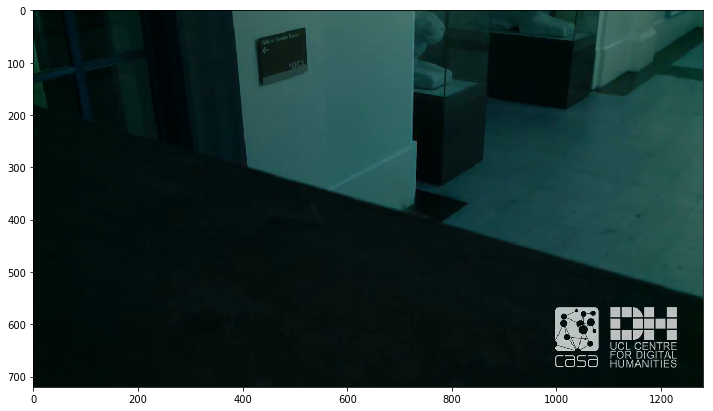

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 1 * weeks)) 
axes.imshow(frame_2)